In [20]:
import sys
sys.path.append('/media/xreco/jianxun/xGCN')

In [21]:
from utils.utils import ensure_dir

/anaconda/envs/pytorch/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
import numpy as np
from matplotlib import pyplot as plt
import os.path as osp

In [23]:
def str_to_float_scores(line):
    return list(map(float, line.split(',')))

def get_lines_and_epoch_after_prop(record_file):
    metric = 8
    score_list = []
    epoch_after_prop = []
    
    epoch = 0
    with open(record_file, 'r') as f:
        f.readline()  # skip the first line
        done = False
        while not done:
            line = f.readline()
            if line == '':
                done = True
            else:
                if line[0] == 'a':  # 'after prop:...'
                    epoch_after_prop.append(epoch + 1)
                else:
                    x = str_to_float_scores(line)
                    s = x[metric]
                    epoch = x[-1]
                    score_list.append(s)
    return np.array(score_list), np.array(epoch_after_prop, dtype=np.int32)

In [24]:
class Line:
    
    def __init__(self, label, record_file):
        self.label = label
        self.score_list, self.epoch_after_prop = get_lines_and_epoch_after_prop(record_file)

In [56]:
# dataset = 'pokec'
dataset = 'livejournal'
# dataset = 'xbox-3m'
data_root = 'data/' + dataset + '/scores_of_different_prop_times/'

# y_full = Line('full', osp.join(data_root, 'train_record[K5][endure3].txt'))
# y_prop1 = Line('prop1', osp.join(data_root, 'train_record[K1][endure9999].txt'))
# y_prop3 = Line('prop3', osp.join(data_root, 'train_record[K3][endure9999].txt'))
# y_prop5 = Line('prop5', osp.join(data_root, 'train_record[K5][endure9999].txt'))
# y_prop10 = Line('prop10', osp.join(data_root, 'train_record[K5][endure3][max_prop_times10].txt'))

y_full = Line('full', osp.join(data_root, 'train_record[K10][endure3].txt'))
y_prop1 = Line('prop1', osp.join(data_root, 'train_record[K1][endure9999].txt'))
y_prop3 = Line('prop3', osp.join(data_root, 'train_record[K3][endure9999].txt'))
y_prop5 = Line('prop5', osp.join(data_root, 'train_record[K5][endure9999].txt'))
y_prop10 = Line('prop10', osp.join(data_root, 'train_record[K10][endure3][max_prop_times10].txt'))

# y_full = Line('full', osp.join(data_root, 'train_record[K20][endure3].txt'))
# y_prop1 = Line('prop1', osp.join(data_root, 'train_record[K1][endure9999].txt'))
# y_prop3 = Line('prop3', osp.join(data_root, 'train_record[K3][endure9999].txt'))
# y_prop5 = Line('prop5', osp.join(data_root, 'train_record[K5][endure9999].txt'))
# y_prop10 = Line('prop10', osp.join(data_root, 'train_record[K20][endure3][max_prop_times10].txt'))

In [57]:
def set_axis_font_density(ax, size=14):
    ax.tick_params(labelsize=size)
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    for label in labels:
        label.set_fontname('Times New Roman')

font_legend = {
    'family': 'Times New Roman',
    'weight': 'normal',
    'size': 15,
}
font_axis_label = {
    'family': 'Times New Roman',
    'weight': 'normal',
    'size': 24,
}
linewidth = 1.5

In [58]:
def draw_a_line(ax, epochs, line, color):
    x = np.arange(epochs)
    ax.plot(x, line.score_list[:epochs], 'o-', color=color,
        linewidth=linewidth, markersize=1, label=line.label)
    mask = line.epoch_after_prop < epochs
    ax.plot(line.epoch_after_prop[mask] - 1, line.score_list[line.epoch_after_prop[mask] - 1], 'o', 
            color='#F96666',
            linewidth=linewidth, markersize=4)

In [59]:
color1 = '#'
color3 = '#'
color5 = '#'
color10 = '#'
color_full = '#'

color1 = '#9CFF2E'
color3 = '#A8E890'
color5 = '#ADDDD0'
color10 = '#749F82'
color_full = '#3CCF4E'

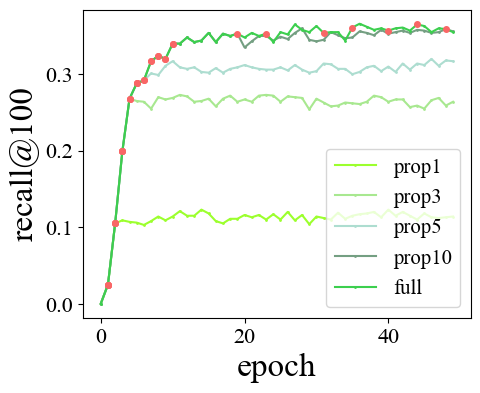

In [60]:
fig, axs = plt.subplots(1 , 1, figsize=(5, 4))

ax = axs

epochs = 50

draw_a_line(ax, epochs, line=y_prop1, color=color1)
draw_a_line(ax, epochs, line=y_prop3, color=color3)
draw_a_line(ax, epochs, line=y_prop5, color=color5)
draw_a_line(ax, epochs, line=y_prop10, color=color10)
draw_a_line(ax, epochs, line=y_full, color=color_full)

# draw_a_line(ax, epochs, line=y_prop1, color='#A8E890')
# draw_a_line(ax, epochs, line=y_prop3, color='#A8E890')
# draw_a_line(ax, epochs, line=y_prop5, color='#A8E890')
# draw_a_line(ax, epochs, line=y_prop7, color='#A8E890')
# draw_a_line(ax, epochs, line=y_prop9, color='#749F82')
# draw_a_line(ax, epochs, line=y_full, color='#3CCF4E')

ax.set_xlabel('epoch', font_axis_label)
ax.set_ylabel('recall@100', font_axis_label)
set_axis_font_density(ax, 16)
# ax.legend(loc='lower right')
ax.legend()

# ax0.legend(prop=font_legend, frameon=True, ncol=2, 
#            bbox_to_anchor=(0.6, 1.0)
# )
ax.legend(prop=font_legend , loc='lower right')
# ax.legend(prop=font_legend)

save_root = 'data/propagation_times/green/'
ensure_dir(save_root)
plt.savefig(osp.join(save_root, dataset + '.pdf'), 
            dpi=300,  bbox_inches='tight')
plt.show()